In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


df = pd.read_csv('feedback.csv')

In [59]:
df

,ID,Location,Track,Week,Rating,Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right
...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right
1450,1497,New York City,Apps,Week 7,10,Just right
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow


In [58]:
pd.options.mode.chained_assignment = None
df.columns = ['ID', 'Location', 'Track', 'Week', 'Rating', 'Pacing']
df['Rating'] = df['Rating'][df['Rating']!='#ERROR!']
df['Rating'].value_counts()

8     387
9     376
10    363
7     167
6      56
5      33
4      11
3       8
2       2
1       2
0       1
Name: Rating, dtype: int64

# Question 1: How do the student's ratings change over the length of the course?

In [104]:
df = df.dropna()
df['Rating'] = df['Rating'].astype(int)
pd.crosstab(df['Week'], df['Rating'])

Rating,0,1,2,3,4,5,6,7,8,9,10
Week,,,,,,,,,,,
Week 1,0,0,0,1,6,9,10,39,89,56,66
Week 2,0,0,0,2,0,6,11,31,80,74,57
Week 3,0,1,0,1,0,4,13,19,63,69,63
Week 4,0,0,0,2,3,6,8,23,49,55,43
Week 5,1,0,1,0,2,3,7,22,45,44,51
Week 6,0,0,1,1,0,1,5,18,41,34,42
Week 7,0,1,0,1,0,4,2,14,19,41,37
Week 8,0,0,0,0,0,0,0,1,1,3,4


In [57]:
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right
...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right
1450,1497,New York City,Apps,Week 7,10,Just right
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow


In [6]:
total = 0
total_list = []
def get_sums():
    for i in range(1, len(df['Week'].value_counts()) + 1):
        total = 0
        for j in range(0, len(df['Rating'].value_counts())):
            total += j * len(df[(df['Week'] == f'Week {i}') & (df['Rating'] == j)])
        total_list.append(round(total/len(df[df['Week'] == f'Week {i}']),3))
    return total_list
        
ratings = get_sums()
weeks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8']

## Although there is a trend upwards in the graph, the last week is an outlier with the small amount of people who filled out a response. Overall the ratings stayed consistent throughout the courses.

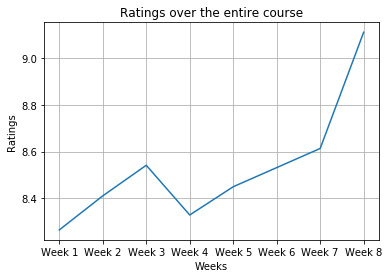

In [7]:
fig, ax = plt.subplots()
ax.plot(weeks, ratings)

ax.set(xlabel='Weeks', ylabel='Ratings',
       title='Ratings over the entire course')
ax.grid()
plt.show()

# Question 2: What is the breakdown of where students are from, and from that, which track is the most popular from the top location compared to the rest of the students.

In [8]:
df['Location'].value_counts()

San Francisco    360
New York City    330
Santa Clara      201
Los Angeles      106
Beijing           78
Chicago           70
Tokyo             65
Redwood City      58
Oakland           47
Washington DC     47
Atlanta           33
Hong Kong         11
Name: Location, dtype: int64

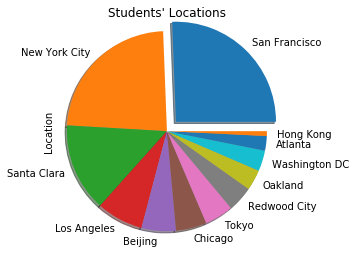

In [46]:
explode = (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0)
df['Location'].value_counts().plot(kind='pie', title="Students' Locations", explode=explode, shadow=True, radius=1.15)

In [12]:
df['Location'].value_counts()

San Francisco    360
New York City    330
Santa Clara      201
Los Angeles      106
Beijing           78
Chicago           70
Tokyo             65
Redwood City      58
Oakland           47
Washington DC     47
Atlanta           33
Hong Kong         11
Name: Location, dtype: int64

In [149]:
df[df['Location'] == 'San Francisco']['Track'].value_counts()

Apps              155
Apps, Explorer     77
Games              68
VR                 60
Name: Track, dtype: int64

In [150]:
df['Track'].value_counts()

Apps               871
Apps, Explorer     224
Games              208
VR                  60
Games, Explorer     43
Name: Track, dtype: int64

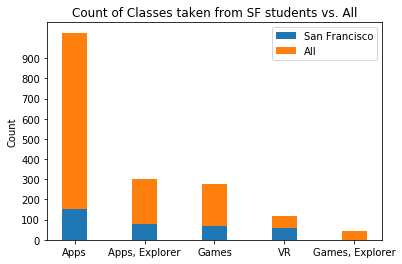

In [99]:
N = 5
sf_classes = (155, 77, 68, 60, 0)
all_classes = (871, 224, 208, 60, 43)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, sf_classes, width)
p2 = plt.bar(ind, all_classes, width,
             bottom=sf_classes)

plt.ylabel('Count')
plt.title('Count of Classes taken from SF students vs. All')
plt.xticks(ind, ('Apps', 'Apps, Explorer', 'Games', 'VR', 'Games, Explorer'))
plt.yticks(np.arange(0, 1000, 100))
plt.legend((p1[0], p2[0]), ('San Francisco', 'All'))

plt.show()


## Out of all the cities, San Francisco is the one on top. The top track picked by students from SF is Apps, same trend for the rest of Students at Make School. Also the only students who took the VR Track were from San Francisco.

# Q3: In the top track category [Apps], what were the student's thoughts on the pacing of the courses?

In [102]:
def apps_pacing():
    pacing = df[df['Track'] == 'Apps']['Pacing']
    just_right, too_slow, too_fast, little_slow, little_fast = 0, 0, 0, 0, 0
    for pace in pacing:
        # dealing with NaN values
        try:
            pacing = str(pacing)
        except ValueError:
            break
        if pace == 'Just right':
            just_right +=1
        elif pace == 'Way too slow':
            too_slow += 1
        elif pace == 'Way too fast':
            too_fast += 1
        elif pace == 'A little too slow':
            little_slow += 1
        else:
            little_fast += 1
    return [just_right, too_slow, too_fast, little_slow, little_fast]
apps_pacing()

[603, 0, 13, 58, 197]

In [75]:
df[df['Track'] == 'Apps']['Pacing'].iloc[150:200]

249           Just right
250           Just right
251    A little too fast
252           Just right
254           Just right
255           Just right
257           Just right
259           Just right
260    A little too fast
263           Just right
264           Just right
265           Just right
266           Just right
267           Just right
269    A little too fast
270    A little too fast
272    A little too fast
273           Just right
277    A little too fast
280           Just right
282           Just right
283           Just right
284           Just right
285           Just right
286    A little too fast
287    A little too fast
288           Just right
298    A little too fast
302    A little too fast
304           Just right
306    A little too fast
307           Just right
309           Just right
311           Just right
313           Just right
315           Just right
317           Just right
318    A little too fast
321           Just right
324           Just right


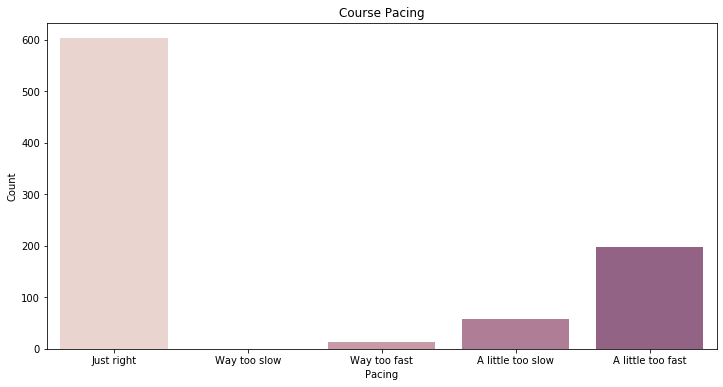

In [127]:
df2 = pd.DataFrame()

df2['Pacing'] = ['Just right', 'Way too slow', 'Way too fast', 'A little too slow', 'A little too fast']
df2['Count'] = apps_pacing()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Pacing", y="Count", data=df2,
                 palette=sns.cubehelix_palette(8)).set_title('Course Pacing')

## In summary most people think the apps class pacing was just right. Interestingly not a single person said the apps class was way too slow.

# Q4: What courses had the highest amount of promoters?

In [128]:
def promoters():
    scores = {}
    tracks = ['Apps', 'Apps, Explorer', 'Games', 'VR', 'Games, Explorer']
    for track in tracks:
        apps_rating = df[df['Track'] == track]['Rating']
        for rating in apps_rating:
            # dealing with NaN values
            try:
                rating = int(rating)
            except ValueError:
                break
            if rating >= 9:
                if track not in scores:
                    scores[track] = scores.get(track, 1)
                else:
                    scores[track] += 1
    return scores
promoters()['Apps']

438

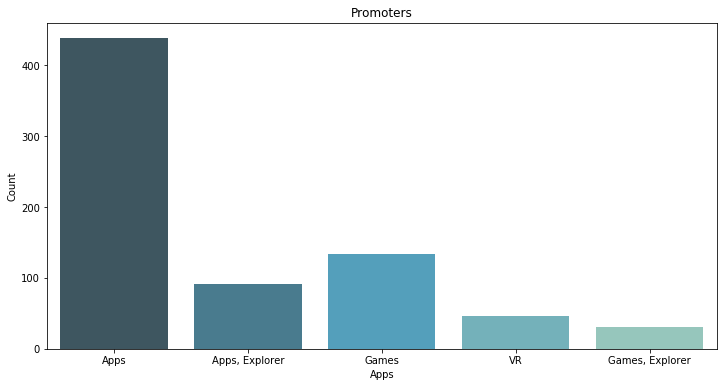

In [126]:
df3 = pd.DataFrame()

df3['Apps'] = ['Apps', 'Apps, Explorer', 'Games', 'VR', 'Games, Explorer']
df3['Count'] = promoters()['Apps'], promoters()['Apps, Explorer'], promoters()['Games'], promoters()['VR'], promoters()['Games, Explorer']
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Apps", y="Count", data=df3,
                 palette="GnBu_d").set_title('Promoters')


